# Identify the type of Missing Data

In [1]:
# import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

In [2]:
# read the data and get some info 
house_original_data = pd.read_csv('../Data/housing_prices.csv', 
                                  usecols = [
                                      "OverallQual","TotalBsmtSF","1stFlrSF","GrLivArea","WoodDeckSF","BsmtUnfSF","Street","MSZoning","LotShape","LotFrontage","MasVnrArea","GarageYrBlt","SalePrice"])

# copy the data 
house_data = house_original_data.copy(deep=True)

# get some info
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     1460 non-null   object 
 1   LotFrontage  1201 non-null   float64
 2   Street       1460 non-null   object 
 3   LotShape     1460 non-null   object 
 4   OverallQual  1460 non-null   int64  
 5   MasVnrArea   1452 non-null   float64
 6   BsmtUnfSF    1460 non-null   int64  
 7   TotalBsmtSF  1460 non-null   int64  
 8   1stFlrSF     1460 non-null   int64  
 9   GrLivArea    1460 non-null   int64  
 10  GarageYrBlt  1379 non-null   float64
 11  WoodDeckSF   1460 non-null   int64  
 12  SalePrice    1460 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 148.4+ KB


Here's a table of selected variables from the dataset, along with their descriptions:  

| **Feature**      | **Description**                                                                                  |
|-------------------|--------------------------------------------------------------------------------------------------|
| **MSZoning**     | The general zoning classification (e.g., residential, commercial).                               |
| **LotFrontage**  | Linear feet of street connected to the property.                                                 |
| **Street**       | Type of road access to the property (e.g., paved or gravel).                                     |
| **LotShape**     | General shape of the property (e.g., regular, irregular).                                        |
| **OverallQual**  | Overall material and finish quality, rated on a scale.                                           |
| **MasVnrArea**   | Masonry veneer area in square feet.                                                              |
| **BsmtUnfSF**    | Unfinished square feet of basement area.                                                         |
| **TotalBsmtSF**  | Total square feet of basement area.                                                              |
| **1stFlrSF**     | Total square feet of the first floor.                                                            |
| **GrLivArea**    | Total above-grade (ground) living area in square feet.                                           |
| **GarageYrBlt**  | Year the garage was built.                                                                       |
| **WoodDeckSF**   | Area of the wood deck in square feet.                                                            |
| **SalePrice**    | The property's sale price in dollars, which is the target variable to predict.                   |

In [3]:
# let us look at the data 
house_data.head()

,MSZoning,LotFrontage,Street,LotShape,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,RL,65.0,Pave,Reg,7,196.0,150,856,856,1710,2003.0,0,208500
1,RL,80.0,Pave,Reg,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,RL,68.0,Pave,IR1,7,162.0,434,920,920,1786,2001.0,0,223500
3,RL,60.0,Pave,IR1,7,0.0,540,756,961,1717,1998.0,0,140000
4,RL,84.0,Pave,IR1,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [6]:
# let us try to identify the columns with missing values 
house_data.isnull().mean()

MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
LotShape       0.000000
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

In [8]:
# let us now take out only the columns with null values through Boolean Masking 
house_data.isnull().sum().sort_values()[house_data.isnull().mean()>0]

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

In [9]:
# let us now store the names of the columns with missing values inside a variable
missing_value_cols = house_data.columns[house_data.isnull().any()]
# Note: missing_value_cols = house_data.isnull().sum().sort_values()[house_data.isnull().mean()>0].index would have also worked!
missing_value_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

## Identifying MCAR 

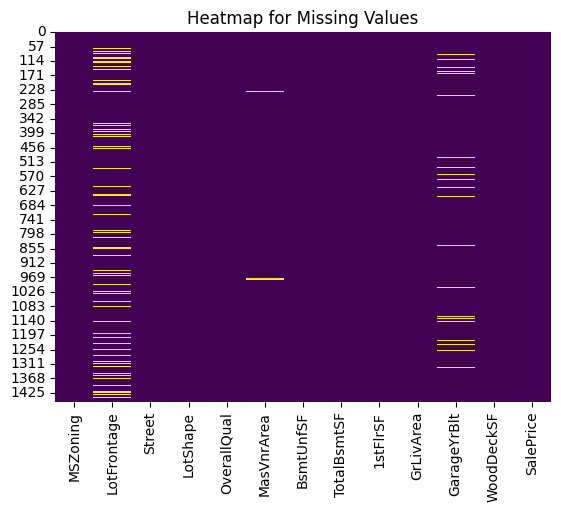

In [13]:
# First, let us create a heatmap for the missing data 
sns.heatmap(
    house_data.isnull(),
    cbar =False, # don't draw a color bar
    cmap = "viridis"
)
plt.title("Heatmap for Missing Values")
plt.show()

From the heatmap:

1. **LotFrontage**:
   - The missing values appear randomly spread across the dataset, showing no strong pattern or dependency on other features. This could indicate that these values are **MCAR (Missing Completely at Random)**.

2. **MasVnrArea**:
   - Missing values are sparse but seem to have a weaker pattern compared to other variables. It could potentially be **MAR (Missing at Random)** if its missingness is dependent on features like `OverallQual` or other construction-related factors.

3. **GarageYrBlt**:
   - The missing values for `GarageYrBlt` might indicate **MNAR (Missing Not at Random)** if they are related to properties that lack garages entirely. For example, if missing values are associated with homes without a garage, the missingness is intrinsic to the feature itself.

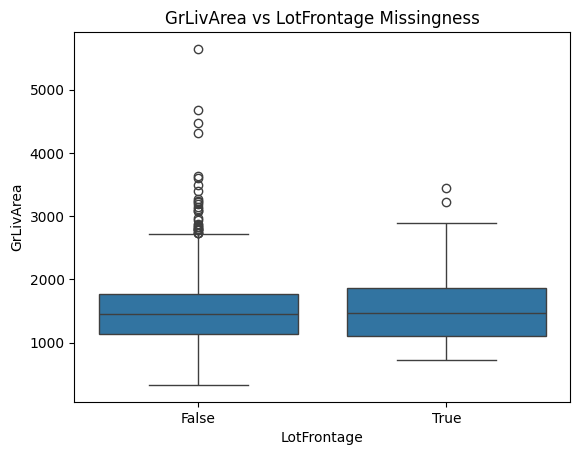

In [61]:
sns.boxplot(x=house_data['LotFrontage'].isnull(), y=house_data['GrLivArea'])
plt.title('GrLivArea vs LotFrontage Missingness')
plt.show()

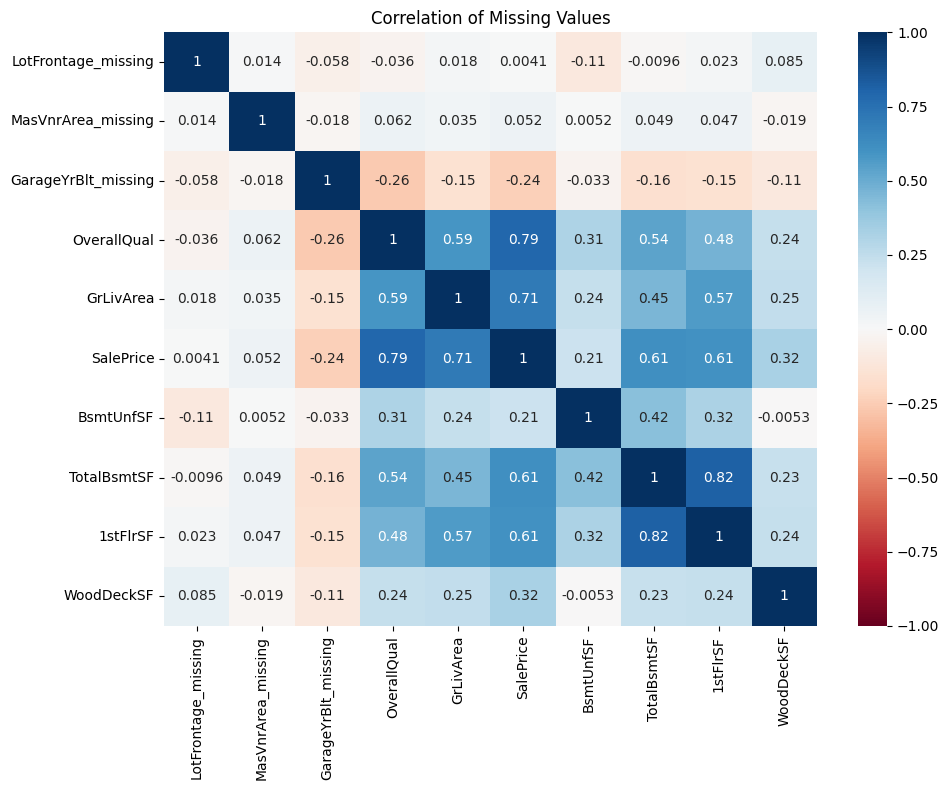

In [17]:
# Create missing indicators
house_data['LotFrontage_missing'] = house_data['LotFrontage'].isnull().astype(int)
house_data['MasVnrArea_missing'] = house_data['MasVnrArea'].isnull().astype(int)
house_data['GarageYrBlt_missing'] = house_data['GarageYrBlt'].isnull().astype(int)

# Correlation matrix of missing indicators with other variables
correlation_matrix = house_data[['LotFrontage_missing', 'MasVnrArea_missing', 'GarageYrBlt_missing', 'OverallQual', 'GrLivArea', 'SalePrice', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','WoodDeckSF']].corr()

 # Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu', 
            center=0,
            vmin=-1,
            vmax=1)
plt.title('Correlation of Missing Values')
plt.tight_layout()
plt.show()

From the correlation heatmap of missing values:

1. **LotFrontage_missing**:
   - The correlation values with other variables are close to 0, indicating that the missingness in `LotFrontage` does not strongly correlate with the values of other features.
   - This suggests the missingness could be **MCAR (Missing Completely at Random)**.

2. **MasVnrArea_missing**:
   - Weak positive correlations with `OverallQual` (0.062) and `SalePrice` (0.052) suggest some dependence on these features, but the correlations are very low.
   - This missingness might be **MAR (Missing at Random)**, depending on further domain knowledge.

3. **GarageYrBlt_missing**:
   - Moderate negative correlations with `OverallQual` (-0.26) and `SalePrice` (-0.24) indicate that the missingness in `GarageYrBlt` might be influenced by the quality or value of the property. For instance, missing `GarageYrBlt` might correlate with properties that lack a garage entirely.
   - This missingness is likely **MNAR (Missing Not at Random)**.

4. **OverallQual**, **GrLivArea**, and **SalePrice**:
   - These variables show strong positive correlations among themselves (e.g., `OverallQual` and `SalePrice`: 0.79), indicating these are interrelated predictors of property quality and value.

---

### Key Insights:
- **LotFrontage** appears to be MCAR, so missing values can likely be imputed without bias.
- **MasVnrArea** could be MAR, and its imputation should consider other variables such as `OverallQual`.
- **GarageYrBlt** is likely MNAR. Investigate if missingness is tied to properties without garages. If so, imputation or handling should reflect this (e.g., assigning a separate category like "No Garage").

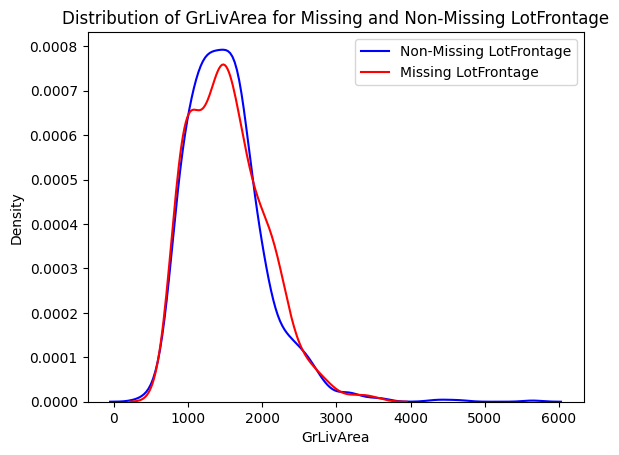

In [63]:
# Example: Compare GrLivArea for missing and non-missing LotFrontage
missing_lotfrontage = house_data[house_data['LotFrontage'].isnull()]
non_missing_lotfrontage = house_data[house_data['LotFrontage'].notnull()]

sns.kdeplot(non_missing_lotfrontage['GrLivArea'], label='Non-Missing LotFrontage', color='blue')
sns.kdeplot(missing_lotfrontage['GrLivArea'], label='Missing LotFrontage', color='red')
plt.legend()
plt.title('Distribution of GrLivArea for Missing and Non-Missing LotFrontage')
plt.show()


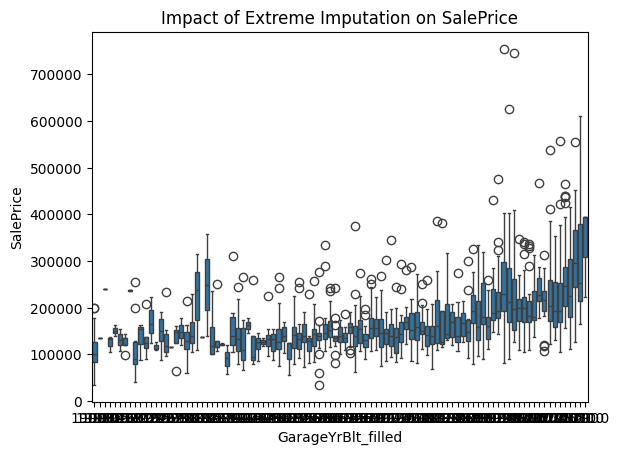

In [64]:
# Impute extreme values for GarageYrBlt
house_data['GarageYrBlt_filled'] = house_data['GarageYrBlt'].fillna(1900)  # Extreme old year
sns.boxplot(x='GarageYrBlt_filled', y='SalePrice', data=house_data)
plt.title('Impact of Extreme Imputation on SalePrice')
plt.show()
